## Applied - Question 8
(a) & (b) Read college.csv file and get the index name.
#### Import block

In [96]:
import pandas as pd
import os
import dfply
from dfply import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

First look at our data:

In [97]:
path = os.path.join(os.getcwd(), 'college.csv')
college = pd.read_csv(path, index_col=0)

college_name = college.index
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


(c) Some exploratory data analysis

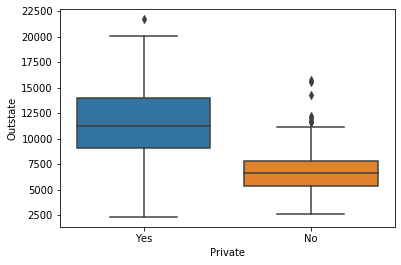

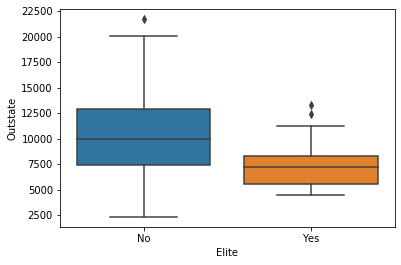

No     764
Yes     13
Name: Elite, dtype: int64

In [98]:


# sns.pairplot(college.iloc[:, :10])
# plt.show()

sns.boxplot(data=college, x=college['Private'], y=college['Outstate'])
plt.show()

@make_symbolic
def where(bools, val_if_true, val_if_false):
	return np.where(bools, val_if_true, val_if_false)


college >>= mutate(Elite=np.where(college['Top10perc'] < 5, 'Yes','No'))
sns.boxplot(data=college, y=college['Outstate'], x=college['Elite'])
plt.show()

college['Elite'].value_counts()


Some histograms

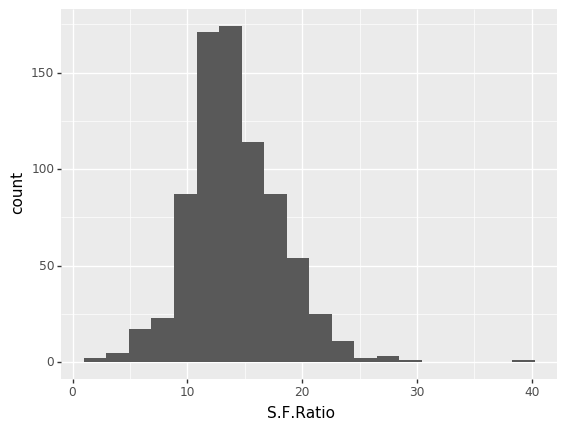

<ggplot: (-9223371934022242300)> <ggplot: (102832523861)> <ggplot: (-9223371934022358917)> <ggplot: (-9223371934022358819)>


d:\pycharmprojects\islr\venv\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 78'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)
d:\pycharmprojects\islr\venv\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 78'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)
d:\pycharmprojects\islr\venv\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 17'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


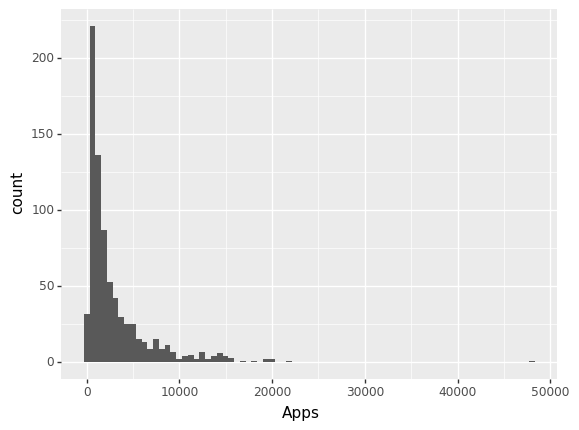

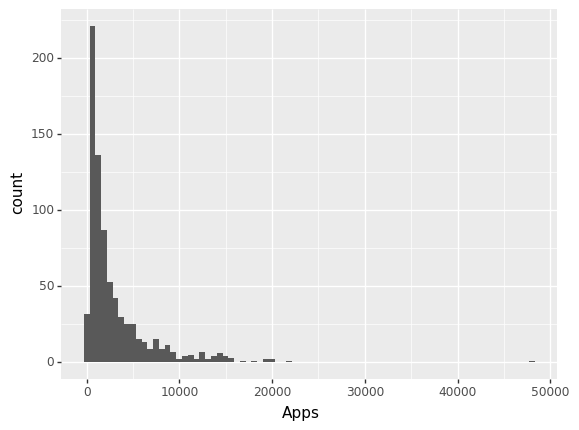

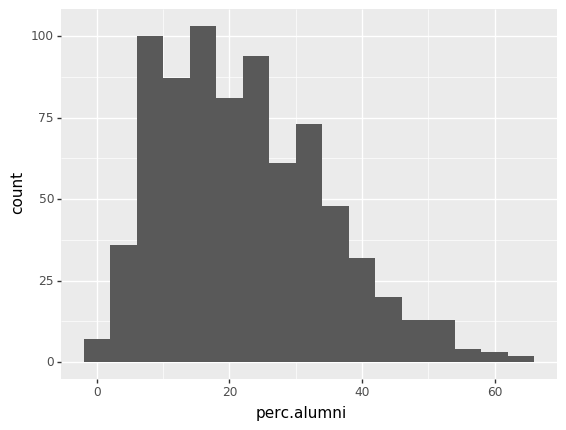

In [99]:
a = ggplot(college) + geom_histogram(aes('S.F.Ratio'), bins=20)
b = ggplot(college) + geom_histogram(aes('Apps'))
c = ggplot(college) + geom_histogram(aes('Apps'))
d = ggplot(college) + geom_histogram(aes('perc.alumni'))
print(a,b,c,d)

Some exploratory graphs

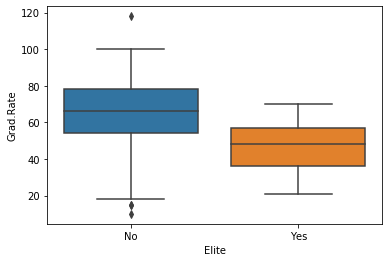

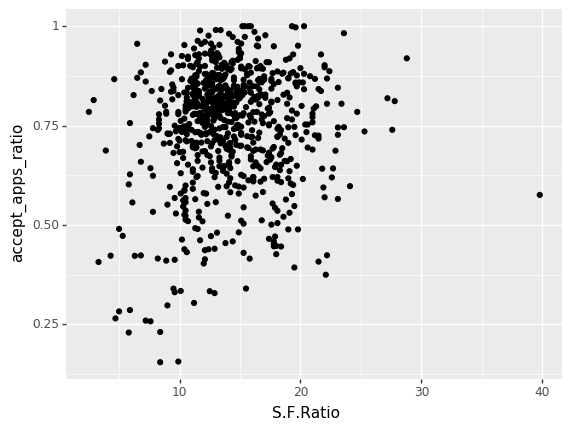

<ggplot: (-9223371934022414332)> <ggplot: (102832323325)> AxesSubplot(0.125,0.125;0.775x0.755)


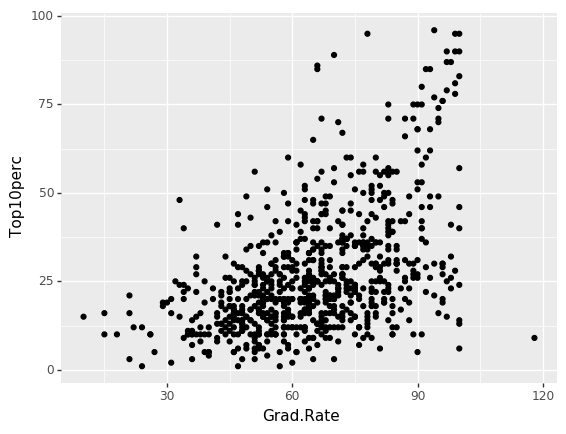

In [100]:
college >>= mutate(accept_apps_ratio = college['Accept'] / college['Apps'])
e = ggplot(data=college) + geom_point(aes(y='accept_apps_ratio', x='S.F.Ratio'))
# Colleges with low acceptance rate tend to have low S:F ratio.
f = ggplot(data=college) + geom_point(aes(y='Top10perc', x='Grad.Rate'))
g = sns.boxplot(data=college, y='Grad.Rate', x='Elite')
print(e,f,g)